<p style="font-size: 20px; margin-bottom: 3px; margin-top: 3px;">By: Ayushman Anupam</p>  
<p style="font-size: 20px; margin-top: 3px;">GitHub Link: <a href="https://github.com/AyushmanGHub">https://github.com/AyushmanGHub</a></p>

### Topic for Project: Customer Segmentation Using Clustering Algorithms
<div style="text-align: center;">
  <span style="color: #4A90E2; font-size: 35px; font-weight: bold;">ClusterCart : Unveiling Customer through Data</span>
  <hr style="border: 1px dashed grey; width: 80%;"/>
</div>


### ---------------------------------------  Importing Needed Libraries --------------------------------------


In [2]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.special import softmax
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
from tabulate import tabulate
from sklearn.cluster import AgglomerativeClustering


# ------------------- Data Cleaning & Preprocessing ---------------------

In [3]:
df = pd.read_excel(r"Online Retail.xlsx")
data_cleaned = df.drop(columns=['InvoiceNo', 'Description', 'InvoiceDate',"UnitPrice"])

In [4]:
# Grouping by CustomerID and pivot the data
encoded_df = df.pivot_table(
    index=["CustomerID", "Country"], 
    columns="StockCode", 
    values="Quantity", 
    aggfunc="sum",
    fill_value=0  # Replace NaN with 0
).reset_index() 

# one-hot encoding for the 'Country' column and ensure integers
country_encoded = pd.get_dummies(encoded_df["Country"], prefix="Country").astype(int)
final_encoded_df = pd.concat([encoded_df.drop(columns=["Country"]), country_encoded], axis=1)

# ---------------------- Exploratory data Analysis -------------------------

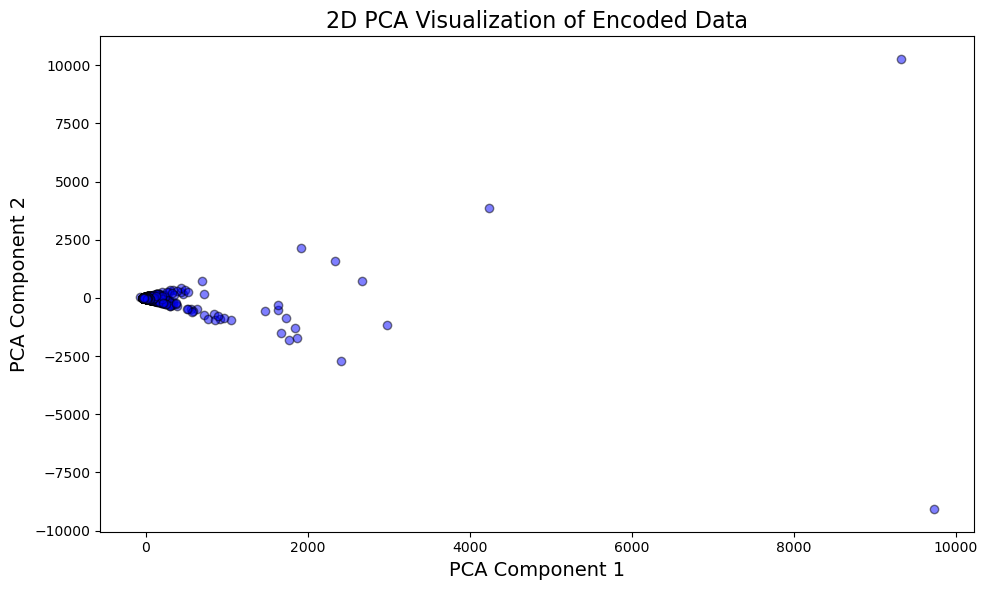

In [5]:
# 2D graph of data

final_encoded_df.columns = final_encoded_df.columns.astype(str)
X = final_encoded_df.drop(columns=["CustomerID"])

# PCA to reduce dimensions to 2 and storing
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_components, columns=["PCA1", "PCA2"])

plt.figure(figsize=(10, 6))
plt.scatter(pca_df["PCA1"], pca_df["PCA2"], c='blue', edgecolor='k', alpha=0.5)
plt.title("2D PCA Visualization of Encoded Data", fontsize=16)
plt.xlabel("PCA Component 1", fontsize=14)
plt.ylabel("PCA Component 2", fontsize=14)
plt.tight_layout()
plt.show()

In [6]:
# 3D plot of data
X = final_encoded_df.drop(columns=["CustomerID"])
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

pca_df = pd.DataFrame(pca_components, columns=["PCA1", "PCA2"])
pca_df["CustomerID"] = final_encoded_df["CustomerID"]

fig = px.scatter_3d(pca_df, x='PCA1', y='PCA2', z='CustomerID',
                    title="3D PCA Visualization of Encoded Data",
                    labels={'PCA1': 'PCA Component 1', 'PCA2': 'PCA Component 2', 'CustomerID': 'Customer ID'})

fig.update_layout(
    scene=dict(
        xaxis_title="PCA Component 1",
        yaxis_title="PCA Component 2",
        zaxis_title="Customer ID",
        xaxis=dict(showgrid=True, zeroline=False, showline=True, linewidth=2, linecolor='black'),
        yaxis=dict(showgrid=True, zeroline=False, showline=True, linewidth=2, linecolor='black'),
        zaxis=dict(showgrid=True, zeroline=False, showline=True, linewidth=2, linecolor='black'),
        bgcolor='rgb(243, 243, 243)',  # Light background 
    ),
    margin=dict(l=0, r=0, b=0, t=40),  # margins 
    title_x=0.5,  
    title_y=0.95, 
    paper_bgcolor='white', 
    font=dict(
        family="Arial, sans-serif", 
        size=12,  
        color="black" 
    )
)
fig.show()

C:\Users\ayush\AppData\Local\Temp\ipykernel_6128\327654162.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




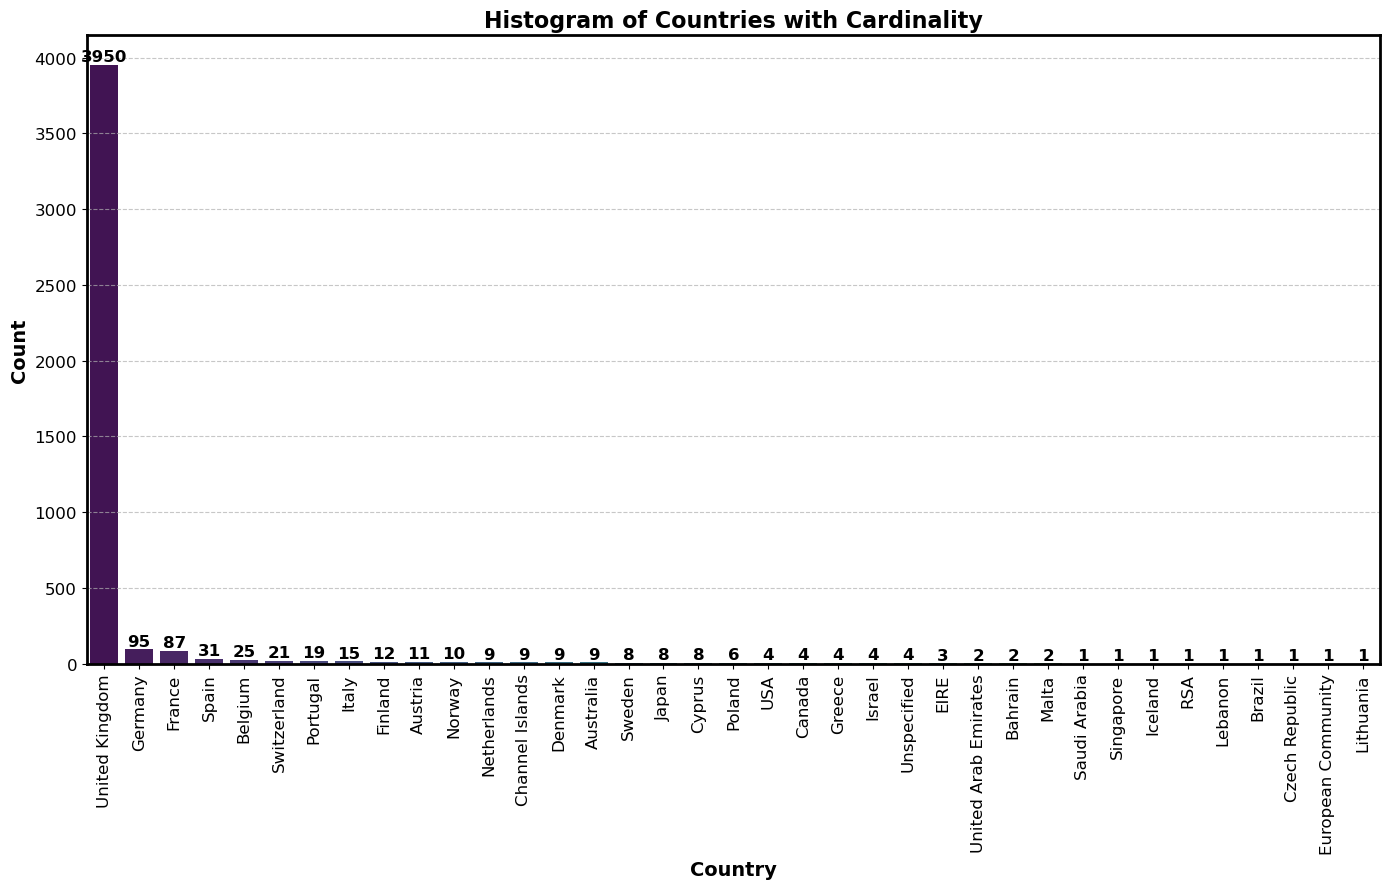

In [7]:
country_counts = encoded_df['Country'].value_counts()

# Plot the histogram (bar chart)
plt.figure(figsize=(14, 9))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')

# Add cardinality on top of each bar
for i, count in enumerate(country_counts.values):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.xlabel('Country', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Histogram of Countries with Cardinality', fontsize=16, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Style the plot with borders and proper layout
plt.xticks(rotation=90, fontsize=12)  
plt.yticks(fontsize=12)
plt.tight_layout()

# Add borders to the plot for a more polished look
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)
plt.show()

C:\Users\ayush\AppData\Local\Temp\ipykernel_6128\2998404703.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




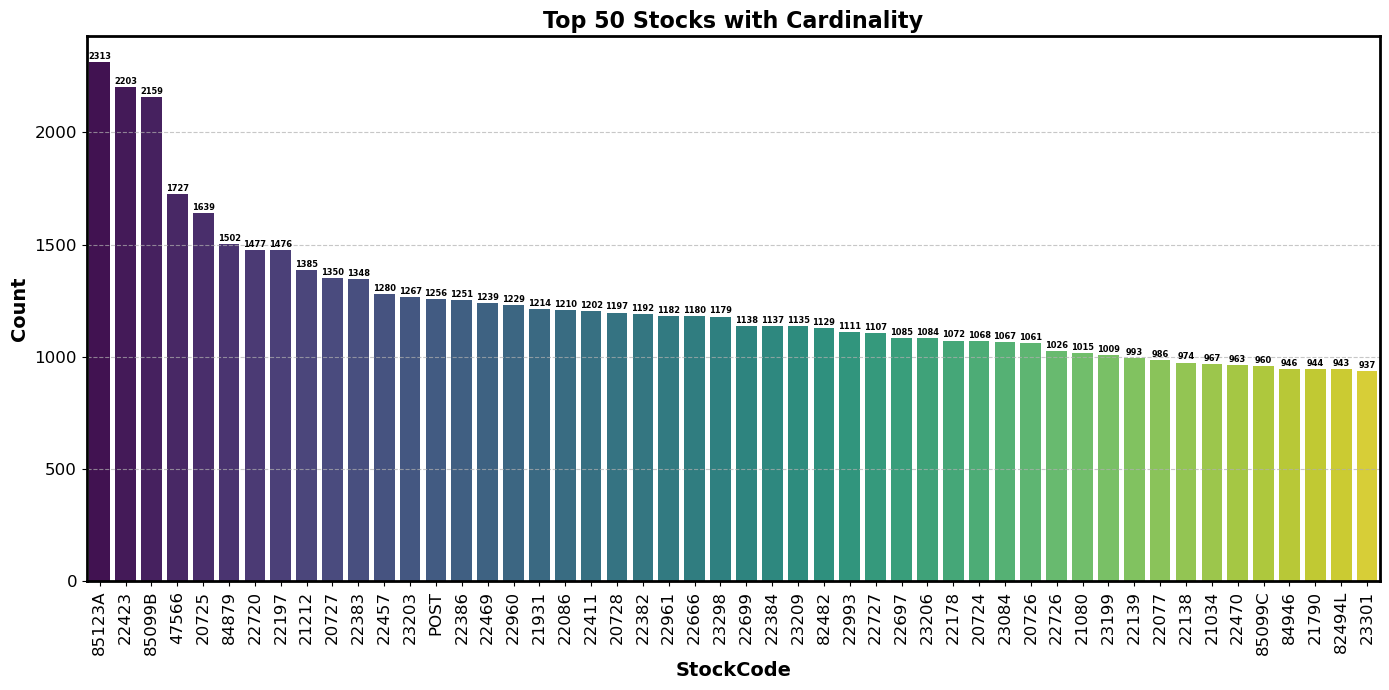

In [8]:
stockcode_counts = df['StockCode'].value_counts()
top_50_stockcodes = stockcode_counts.head(50)

plt.figure(figsize=(14, 7))
sns.barplot(x=top_50_stockcodes.index, y=top_50_stockcodes.values, palette='viridis')

# Add cardinality on top of each bar
for i, count in enumerate(top_50_stockcodes.values):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=6, color='black', fontweight='bold')

# Set labels and title
plt.xlabel('StockCode', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Top 50 Stocks with Cardinality', fontsize=16, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=90, fontsize=12) 
plt.yticks(fontsize=12)
plt.tight_layout()

for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)
plt.show()


# ---------------------------- Different ML Models --------------------------

## 1. K-Means Clustering:
K-Means is a popular clustering algorithm that partitions data into k clusters. It minimizes the variance within clusters.

## -------------------  Training ----------------------

In [9]:
final_encoded_df.columns = final_encoded_df.columns.astype(str)
k = 7  #  number of clusters

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(final_encoded_df)

KMeans_Cluster_df = final_encoded_df.copy()
KMeans_Cluster_df.insert(1, 'KMeans_Cluster', kmeans_labels)
KMeans_Cluster_df.head()

,CustomerID,KMeans_Cluster,10002,10080,10120,10125,10133,10135,11001,15030,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,12346.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,12347.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12348.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12349.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12350.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## ------------------------------------ Model Evaluation ----------------------------------

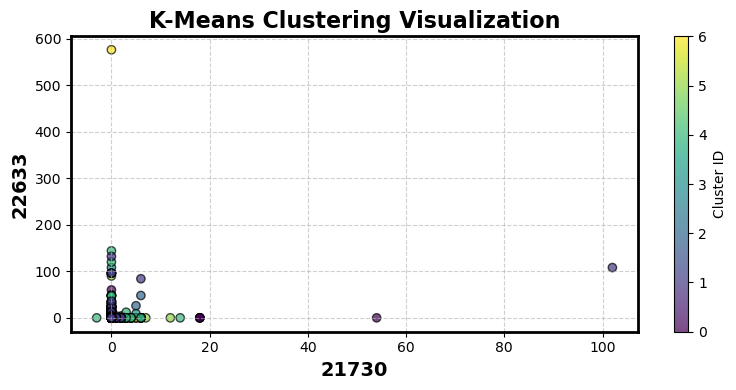

In [10]:
plt.figure(figsize=(8, 4))
scatter = plt.scatter(KMeans_Cluster_df['21730'], KMeans_Cluster_df['22633'], c=KMeans_Cluster_df['KMeans_Cluster'], cmap='viridis', edgecolor='k', alpha=0.7)

plt.colorbar(scatter, label='Cluster ID')
plt.xlabel('21730', fontsize=14, fontweight='bold')
plt.ylabel('22633', fontsize=14, fontweight='bold')
plt.title('K-Means Clustering Visualization', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)

for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)
plt.tight_layout()
plt.show()

In [11]:
# Get the unique cluster labels
unique_clusters = KMeans_Cluster_df['KMeans_Cluster'].nunique()


print("\n" + "="*40)
print(f"{'Number of Clusters:':<25}{unique_clusters}")
print("="*40)

cluster_cardinality = KMeans_Cluster_df['KMeans_Cluster'].value_counts()
print("\nCardinality of each Cluster:")
print("="*40)
for cluster, count in cluster_cardinality.items():
    print(f"Cluster {cluster:<3} | Count: {count:>5}")
print("="*40)


Number of Clusters:      7

Cardinality of each Cluster:
Cluster 2   | Count:   647
Cluster 6   | Count:   638
Cluster 5   | Count:   634
Cluster 0   | Count:   628
Cluster 1   | Count:   617
Cluster 4   | Count:   609
Cluster 3   | Count:   607


In [18]:
cluster_cardinality = KMeans_Cluster_df['KMeans_Cluster'].value_counts().reset_index()
# Rename columns for better readability
cluster_cardinality.columns = ['Cluster Label', 'Number of Points']

fig = px.bar(
    cluster_cardinality,
    x='Cluster Label',
    y='Number of Points',
    title='Distribution of KMeans Clusters',
    labels={'Cluster Label': 'Cluster', 'Number of Points': 'Count'},
    color='Cluster Label',
    color_continuous_scale='Viridis',
    opacity=0.8
)

# Update layout with custom axis ranges
fig.update_layout(
    title_font_size=24,
    title_font_color='black',
    xaxis_title='Cluster Label',
    yaxis_title='Number of Points',
    xaxis_tickfont=dict(size=14),
    yaxis_tickfont=dict(size=14),
    margin=dict(l=50, r=50, t=40, b=60), 
    paper_bgcolor='white',  # White background
    plot_bgcolor='white',  # White plot area
    showlegend=False,
    yaxis=dict(range=[600, 650])  # Start y-axis at 600
)

fig.show()


In [12]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(KMeans_Cluster_df.drop(columns=["CustomerID", "KMeans_Cluster"]))

# Adding the PCA components and KMeans cluster labels back to the dataframe
pca_df = pd.DataFrame(pca_components, columns=["PCA1", "PCA2"])
pca_df['CustomerID'] = KMeans_Cluster_df['CustomerID']
pca_df['KMeans_Cluster'] = KMeans_Cluster_df['KMeans_Cluster']

#  3D scatter plot using Plotly, colored by KMeans cluster labels
fig = px.scatter_3d(pca_df, x='CustomerID', y='PCA1', z='PCA2', color='KMeans_Cluster',
                    title="3D Scatter Plot with PCA Dimensions and KMeans Clusters",
                    labels={'CustomerID': 'Customer ID', 'PCA1': 'PCA Component 1', 'PCA2': 'PCA Component 2', 'KMeans_Cluster': 'KMeans Clusters'})

fig.update_layout(
    scene=dict(
        xaxis=dict(title='Customer ID', tickfont=dict(size=12, color='black')),
        yaxis=dict(title='PCA Component 1', tickfont=dict(size=12, color='black')),
        zaxis=dict(title='PCA Component 2', tickfont=dict(size=12, color='black')),
        bgcolor='rgba(0, 0, 0, 0)',  
    ),
    title={
        'text': "3D Scatter Plot with PCA and KMeans Clusters",
        'x': 0.5,  # Center the title
        'xanchor': 'center',
        'font': {'size': 20, 'family': 'Arial', 'color': 'darkblue'}
    },
    coloraxis_colorbar=dict(
        title="Cluster", tickvals=[0, 1, 2, 3, 4], ticktext=["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]
    ), margin=dict(l=0, r=0, b=0, t=40)
)
fig.show()

In [13]:
# Getting the cluster centroids (average feature values for each cluster)
centroids = kmeans.cluster_centers_

columns = KMeans_Cluster_df.drop(columns=['CustomerID', 'KMeans_Cluster']).columns
# Check if centroids have one extra column and remove it if needed
if centroids.shape[1] > len(columns):
    centroids = centroids[:, :-1]  # Remove the extra column
    print("Removed extra column from centroids.")

centroids_df = pd.DataFrame(centroids, columns=columns)
print("Centroids of each cluster:")
centroids_df.head()

Removed extra column from centroids.
Centroids of each cluster:


,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,14488.469745,0.187898,0.058917,0.009554,0.197452,0.968153,0.673567,0.165605,8.326673e-17,1.054140,...,3.295975e-17,8.944668e-19,8.944668e-19,8.944668e-19,-3.035766e-17,7.155734e-18,3.816392e-17,3.577867e-18,1.788934e-18,0.984076
1,17865.952998,0.170178,0.128039,0.103728,0.329011,0.878444,0.465154,0.152350,6.969206e-02,0.802269,...,3.295975e-17,1.084202e-18,1.084202e-18,1.084202e-18,-2.949030e-17,8.673617e-18,3.816392e-17,4.336809e-18,1.620746e-03,0.993517
2,12746.279753,0.686244,0.037094,0.024730,0.942813,0.222566,0.635240,0.661515,1.004637e-01,1.652241,...,2.936631e-02,1.545595e-03,1.545595e-03,1.545595e-03,4.636785e-02,1.081917e-02,2.472952e-02,6.182380e-03,1.545595e-03,0.408037
3,16188.461285,0.049423,0.059308,0.003295,0.097199,0.481054,0.281713,0.298188,1.387779e-16,0.219110,...,3.035766e-17,1.409463e-18,1.409463e-18,1.409463e-18,-2.862294e-17,1.127570e-17,3.642919e-17,5.637851e-18,2.818926e-18,0.996705
4,17021.474548,0.093596,0.087028,0.106732,0.101806,0.545156,0.126437,0.062397,1.313629e-02,0.321839,...,9.540979e-18,7.589415e-19,7.589415e-19,7.589415e-19,1.642036e-03,1.642036e-03,2.949030e-17,3.035766e-18,1.517883e-18,0.993432


In [14]:
cluster_stats = KMeans_Cluster_df.drop(columns= "CustomerID").groupby('KMeans_Cluster').agg('mean')
# Apply softmax to each column independently
normalized_cluster_stats = cluster_stats.apply(lambda x: softmax(x), axis=0)
# Rename the mean column to "mean_probability"
normalized_cluster_stats = normalized_cluster_stats.rename(columns={col: f"mean_probability_{col}" for col in normalized_cluster_stats.columns})
print("\nNormalized Descriptive Probability for each KMeans cluster (using softmax):")
normalized_cluster_stats



Normalized Descriptive Probability for each KMeans cluster (using softmax):


,mean_probability_10002,mean_probability_10080,mean_probability_10120,mean_probability_10125,mean_probability_10133,mean_probability_10135,mean_probability_11001,mean_probability_15030,mean_probability_15034,mean_probability_15036,...,mean_probability_Country_RSA,mean_probability_Country_Saudi Arabia,mean_probability_Country_Singapore,mean_probability_Country_Spain,mean_probability_Country_Sweden,mean_probability_Country_Switzerland,mean_probability_Country_USA,mean_probability_Country_United Arab Emirates,mean_probability_Country_United Kingdom,mean_probability_Country_Unspecified
KMeans_Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.139685,0.141657,0.137839,0.126015,0.210436,0.177199,0.129924,0.138236,0.059512,0.000368,...,0.142826,0.142826,0.142826,0.141862,0.142602,0.142188,0.142731,0.142793,0.151903,0.142955
1,0.137232,0.151795,0.151451,0.143733,0.192380,0.143863,0.128214,0.148213,0.046261,0.000317,...,0.142826,0.142826,0.142826,0.141862,0.142602,0.142188,0.142731,0.143024,0.153344,0.142728
2,0.229921,0.138599,0.139947,0.265539,0.099843,0.170536,0.213335,0.152845,0.108231,0.178671,...,0.143047,0.143047,0.143047,0.148595,0.144153,0.145748,0.143616,0.143013,0.085388,0.143170
3,0.121622,0.141712,0.136979,0.113994,0.129293,0.119751,0.148344,0.138236,0.025820,0.000147,...,0.142826,0.142826,0.142826,0.141862,0.142602,0.142188,0.142731,0.142793,0.153834,0.142963
4,0.127115,0.145695,0.151906,0.114521,0.137853,0.102529,0.117184,0.140064,0.028613,0.818680,...,0.142826,0.142826,0.142826,0.142095,0.142836,0.142188,0.142731,0.142793,0.153331,0.142728
5,0.122714,0.136104,0.136744,0.121490,0.101894,0.165568,0.141477,0.141545,0.701019,0.001766,...,0.142826,0.142826,0.142826,0.141862,0.142602,0.143314,0.142731,0.142793,0.150495,0.142728
6,0.121711,0.144439,0.145134,0.114709,0.128302,0.120555,0.121522,0.140861,0.030544,0.000050,...,0.142826,0.142826,0.142826,0.141862,0.142602,0.142188,0.142731,0.142793,0.151703,0.142728


## 2. DBSCAN Clustering:
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) identifies clusters of varying shapes based on density. It is useful for datasets with noise.

## -----------------------  Training  Non Normalized data -------------------------

In [15]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(final_encoded_df)


DBSCAN_Cluster_df = final_encoded_df.copy()
DBSCAN_Cluster_df.insert(1, 'DBSCAN_Cluster', dbscan_labels)
# Find the number of clusters (excluding noise, which is labeled as -1)
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f'Number of clusters (excluding noise): {num_clusters}')
# Since above is not working we will first normalize the data then do clustering

Number of clusters (excluding noise): 0


## -----------------------  Training Normalized data -------------------------

In [16]:
# Normalize the data
scaler = MinMaxScaler() 
normalized_data = scaler.fit_transform(final_encoded_df.drop(columns=["CustomerID"]))
normalized_df = pd.DataFrame(normalized_data, columns=final_encoded_df.drop(columns=["CustomerID"]).columns)

dbscan = DBSCAN(eps=1.0, min_samples=5)  
dbscan_labels = dbscan.fit_predict(normalized_df)

DBSCAN_Cluster_df2 = final_encoded_df.copy()
DBSCAN_Cluster_df2.insert(1, 'DBSCAN_Cluster', dbscan_labels)

num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f'Number of clusters (excluding noise): {num_clusters}')
DBSCAN_Cluster_df2.head()

Number of clusters (excluding noise): 16


,CustomerID,DBSCAN_Cluster,10002,10080,10120,10125,10133,10135,11001,15030,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,12346.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,12347.0,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12348.0,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12349.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12350.0,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## ----------------------------- Model Evaluation --------------------------------

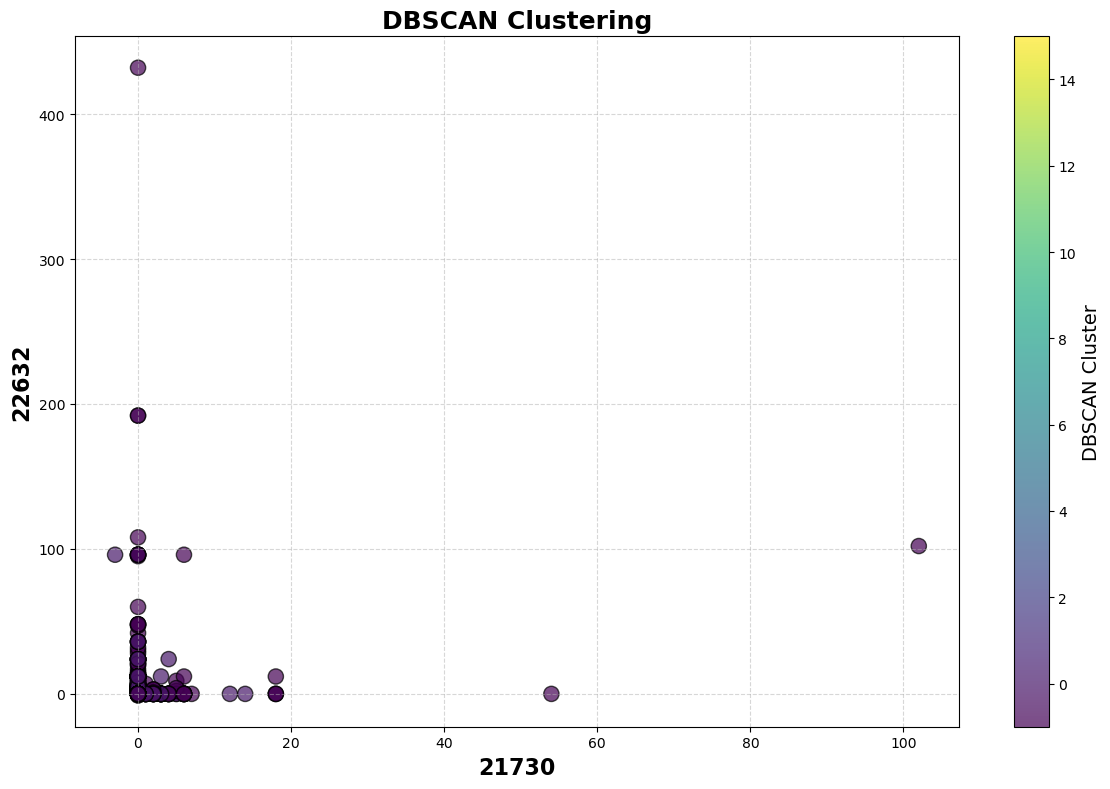

In [17]:
plt.figure(figsize=(12, 8)) 
scatter = plt.scatter(DBSCAN_Cluster_df2['21730'], DBSCAN_Cluster_df2['22632'], 
                      c=DBSCAN_Cluster_df2['DBSCAN_Cluster'], cmap='viridis', 
                      edgecolors='black', alpha=0.7, s=120)  
cbar = plt.colorbar(scatter)
cbar.set_label('DBSCAN Cluster', fontsize=14)

# labels and title with larger font sizes and bold style
plt.xlabel('21730', fontsize=16, fontweight='bold')
plt.ylabel('22632', fontsize=16, fontweight='bold')
plt.title('DBSCAN Clustering', fontsize=18, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [18]:
# Find the cardinality (count) of each distinct value in 'DBSCAN_Cluster'
cluster_cardinality = DBSCAN_Cluster_df2['DBSCAN_Cluster'].value_counts().reset_index()

# Rename columns for better readability
cluster_cardinality.columns = ['Cluster Label', 'Number of Points']
print("\nCardinality of each cluster:")
print(tabulate(cluster_cardinality, headers='keys', tablefmt='pretty', showindex=False))


Cardinality of each cluster:
+---------------+------------------+
| Cluster Label | Number of Points |
+---------------+------------------+
|       0       |       2663       |
|      -1       |       1494       |
|       9       |        57        |
|      11       |        54        |
|       2       |        18        |
|       4       |        14        |
|      10       |        12        |
|       6       |        10        |
|       1       |        9         |
|       5       |        8         |
|       3       |        7         |
|      14       |        7         |
|      12       |        6         |
|      13       |        6         |
|       8       |        5         |
|       7       |        5         |
|      15       |        5         |
+---------------+------------------+


In [19]:
# histogram of DBSCAN cluster labels
histogram = px.histogram(DBSCAN_Cluster_df2, x="DBSCAN_Cluster", 
                          title="Distribution of DBSCAN Cluster Labels",
                          labels={'DBSCAN_Cluster': 'Cluster Label'},
                          color="DBSCAN_Cluster", 
                          color_discrete_sequence=px.colors.qualitative.Set1, 
                          opacity=0.8)
histogram.update_layout(
    title_font_size=20,
    xaxis_title='Cluster Label',
    yaxis_title='Frequency',
    title_font_color='black',
    xaxis_title_font=dict(size=14, color='black'),
    yaxis_title_font=dict(size=14, color='black'),
    xaxis=dict(tickfont=dict(size=12, color='black')),
    yaxis=dict(tickfont=dict(size=12, color='black')),
    plot_bgcolor='white',
    paper_bgcolor='white',
)
histogram.show()

In [20]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(DBSCAN_Cluster_df2.drop(columns=["CustomerID"]))
pca_df = pd.DataFrame(pca_components, columns=["PCA1", "PCA2"])
pca_df['CustomerID'] = DBSCAN_Cluster_df2['CustomerID']
pca_df['DBSCAN_Cluster'] = DBSCAN_Cluster_df2['DBSCAN_Cluster']

distinct_colors = {
    -1: 'rgb(255, 0, 0)',    # Noise points in red
    0: 'rgb(0, 255, 0)',     # Cluster 0 in green
    1: 'rgb(0, 0, 255)',     # Cluster 1 in blue
    2: 'rgb(255, 165, 0)',   # Cluster 2 in orange
    3: 'rgb(255, 255, 0)',   # Cluster 3 in yellow
    4: 'rgb(75, 0, 130)',    # Cluster 4 in indigo
    5: 'rgb(255, 20, 147)',  # Cluster 5 in deep pink
    6: 'rgb(0, 128, 128)',   # Cluster 6 in teal
    7: 'rgb(255, 69, 0)',    # Cluster 7 in red-orange
    8: 'rgb(0, 255, 255)',   # Cluster 8 in cyan
    9: 'rgb(128, 0, 128)',   # Cluster 9 in purple
    10: 'rgb(0, 255, 127)',  # Cluster 10 in spring green
    11: 'rgb(255, 105, 180)',# Cluster 11 in hot pink
    12: 'rgb(100, 149, 237)',# Cluster 12 in cornflower blue
    13: 'rgb(218, 165, 32)', # Cluster 13 in goldenrod
    14: 'rgb(34, 139, 34)',  # Cluster 14 in forest green
}

fig = px.scatter_3d(pca_df, x='CustomerID', y='PCA1', z='PCA2', color='DBSCAN_Cluster', 
                    color_discrete_map=distinct_colors,
                    title="3D Scatter Plot with PCA Dimensions and DBSCAN Clusters",
                    labels={'CustomerID': 'Customer ID', 'PCA1': 'PCA Component 1', 'PCA2': 'PCA Component 2'},
                    opacity=0.7,  
                    size_max=10, 
                    width=800, height=600)  
fig.show()


In [21]:
cluster_stats = DBSCAN_Cluster_df2.drop(columns=['CustomerID']).groupby('DBSCAN_Cluster').agg(['mean'])
cluster_stats.columns = [f'{col[0]}' for col in cluster_stats.columns]
normalized_cluster_stat = cluster_stats.apply(lambda x: softmax(x, axis=0), axis=0)
normalized_cluster_stats = normalized_cluster_stat.rename(columns={col: f"mean_probability_{col}" for col in normalized_cluster_stat.columns})
normalized_cluster_stats

,mean_probability_10002,mean_probability_10080,mean_probability_10120,mean_probability_10125,mean_probability_10133,mean_probability_10135,mean_probability_11001,mean_probability_15030,mean_probability_15034,mean_probability_15036,...,mean_probability_Country_RSA,mean_probability_Country_Saudi Arabia,mean_probability_Country_Singapore,mean_probability_Country_Spain,mean_probability_Country_Sweden,mean_probability_Country_Switzerland,mean_probability_Country_USA,mean_probability_Country_United Arab Emirates,mean_probability_Country_United Kingdom,mean_probability_Country_Unspecified
DBSCAN_Cluster,,,,,,,,,,,,,,,,,,,,,
-1,0.081066,0.069363,0.063541,0.101035,0.191792,0.137015,0.099946,0.061212,0.533420,0.997858,...,0.058861,0.058861,0.058861,0.053865,0.053491,0.053797,0.058972,0.058898,0.108220,0.058972
0,0.049547,0.058720,0.058677,0.054093,0.057446,0.064785,0.060368,0.060285,0.034693,0.000594,...,0.058821,0.058821,0.058821,0.053399,0.053420,0.053403,0.058814,0.058819,0.124719,0.058814
1,0.048808,0.058128,0.057780,0.051149,0.050051,0.053213,0.055979,0.058567,0.027757,0.000205,...,0.058821,0.058821,0.058821,0.053399,0.053420,0.053403,0.058814,0.058819,0.045882,0.058814
2,0.185162,0.058128,0.057780,0.051149,0.050051,0.053213,0.055979,0.058567,0.027757,0.000054,...,0.058821,0.058821,0.058821,0.145153,0.053420,0.053403,0.058814,0.058819,0.045882,0.058814
3,0.048808,0.058128,0.057780,0.051149,0.050051,0.053213,0.055979,0.058567,0.027757,0.000054,...,0.058821,0.058821,0.058821,0.053399,0.053420,0.053403,0.058814,0.058819,0.045882,0.058814
4,0.048808,0.058128,0.057780,0.051149,0.050051,0.053213,0.055979,0.058567,0.027757,0.000054,...,0.058821,0.058821,0.058821,0.053399,0.053420,0.053403,0.058814,0.058819,0.045882,0.058814
5,0.048808,0.058128,0.057780,0.051149,0.050051,0.053213,0.055979,0.058567,0.027757,0.000054,...,0.058821,0.058821,0.058821,0.053399,0.053420,0.053403,0.058814,0.058819,0.045882,0.058814
6,0.048808,0.058128,0.057780,0.051149,0.050051,0.053213,0.055979,0.058567,0.027757,0.000054,...,0.058821,0.058821,0.058821,0.053399,0.053420,0.145163,0.058814,0.058819,0.045882,0.058814
7,0.048808,0.058128,0.057780,0.051149,0.050051,0.053213,0.055979,0.058567,0.027757,0.000054,...,0.058821,0.058821,0.058821,0.053399,0.053420,0.053403,0.058814,0.058819,0.045882,0.058814


## 3. Hierarchical Clustering:
Hierarchical clustering creates a tree-like structure (dendrogram) to represent the clusters. You can choose to cut the tree at a certain level to get your clusters.

## -----------------------  Training  -------------------------

In [22]:
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward') 
hierarchical_clusters = hierarchical.fit_predict(final_encoded_df.drop(columns=["CustomerID"]))

Hierarchical_Cluster_df = final_encoded_df.copy()
Hierarchical_Cluster_df.insert(1, 'Hierarchical_Cluster', hierarchical_clusters)
Hierarchical_Cluster_df.head()

,CustomerID,Hierarchical_Cluster,10002,10080,10120,10125,10133,10135,11001,15030,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,12346.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,12347.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12348.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12349.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12350.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## ------------------------------ Model Evaluation --------------------------------

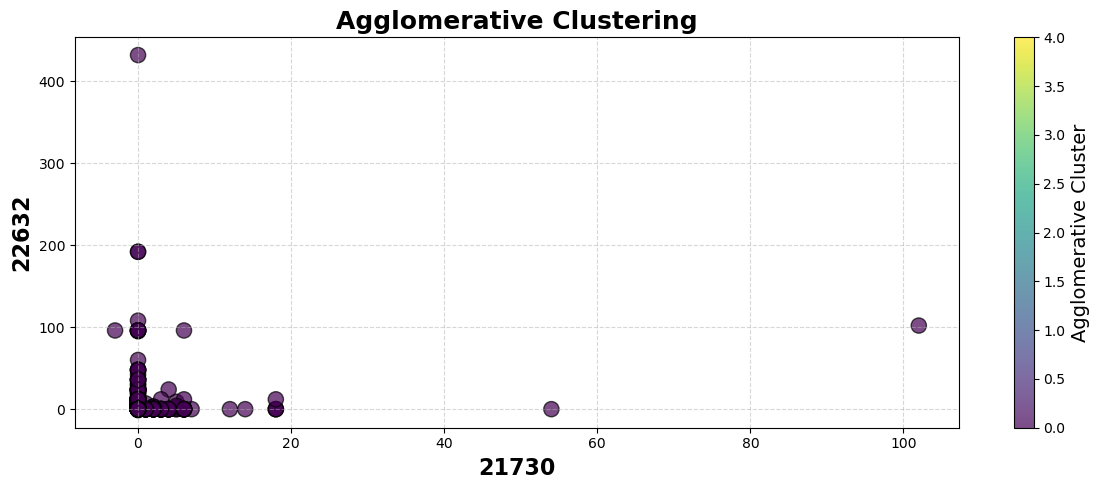

In [23]:
plt.figure(figsize=(12, 5))  # Increase figure size for better clarity
scatter = plt.scatter(Hierarchical_Cluster_df['21730'], Hierarchical_Cluster_df['22632'], 
                      c=Hierarchical_Cluster_df['Hierarchical_Cluster'], cmap='viridis', 
                      edgecolors='black', alpha=0.7, s=120)  
cbar = plt.colorbar(scatter)
cbar.set_label('Agglomerative Cluster', fontsize=14)
plt.xlabel('21730', fontsize=16, fontweight='bold')
plt.ylabel('22632', fontsize=16, fontweight='bold')
plt.title('Agglomerative Clustering', fontsize=18, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [24]:
unique_clusters = Hierarchical_Cluster_df['Hierarchical_Cluster'].nunique()
print(f"\n{'#' * 30}\n{'Cluster Overview':^30}\n{'#' * 30}")
print(f"\nNumber of unique clusters: {unique_clusters}")
print(f"{'#' * 30}\n")
cluster_cardinality = Hierarchical_Cluster_df['Hierarchical_Cluster'].value_counts().sort_index()
print(f"{'Cluster':<15}{'Cardinality':<12}")
print("-" * 30)
for cluster, count in cluster_cardinality.items():
    print(f"{cluster:<15}{count:<12}")


##############################
       Cluster Overview       
##############################

Number of unique clusters: 5
##############################

Cluster        Cardinality 
------------------------------
0              4375        
1              2           
2              1           
3              1           
4              1           


In [25]:
# Create a DataFrame for easy table visualization
cardinality_df = cluster_cardinality.reset_index()
cardinality_df.columns = ['Cluster', 'Cardinality']

# Display the cardinality table
fig = px.bar(cardinality_df, x='Cluster', y='Cardinality', 
             title="Cardinality of Each Hierarchical Cluster",
             labels={'Cluster': 'Cluster Label', 'Cardinality': 'Number of Elements'},
             color='Cardinality', color_continuous_scale='Viridis')
fig.show()

In [26]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(Hierarchical_Cluster_df.drop(columns=["CustomerID", "Hierarchical_Cluster"]))
pca_df = pd.DataFrame(pca_components, columns=["PCA1", "PCA2"])
pca_df['CustomerID'] = Hierarchical_Cluster_df['CustomerID']
pca_df['Hierarchical_Cluster'] = Hierarchical_Cluster_df['Hierarchical_Cluster']
fig = px.scatter_3d(pca_df, 
                    x='PCA1', y='PCA2', z='CustomerID', 
                    color='Hierarchical_Cluster',
                    title="3D Scatter Plot with PCA Dimensions and Hierarchical Clusters",
                    labels={'PCA1': 'PCA Component 1', 
                            'PCA2': 'PCA Component 2', 
                            'CustomerID': 'Customer ID', 
                            'Hierarchical_Cluster': 'Hierarchical Cluster'},
                    color_continuous_scale='Viridis',  
                    opacity=0.8)  
fig.update_layout(
    title_font_size=20,
    title_font_color='black', 
    scene=dict(
        xaxis=dict(
            title='PCA Component 1',
            titlefont=dict(size=14, color='black'),
            tickfont=dict(size=12, color='black')
        ),
        yaxis=dict(
            title='PCA Component 2',
            titlefont=dict(size=14, color='black'),
            tickfont=dict(size=12, color='black')
        ),
        zaxis=dict(
            title='Customer ID',
            titlefont=dict(size=14, color='black'),
            tickfont=dict(size=12, color='black')
        ),
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    paper_bgcolor='white',  
    plot_bgcolor='white',   
    font=dict(color='black')
)
fig.show()

In [27]:
cluster_stats_hierarchical = Hierarchical_Cluster_df.drop(columns=['CustomerID']).groupby('Hierarchical_Cluster').agg(['mean'])
cluster_stats_hierarchical.columns = [f'{col[0]}' for col in cluster_stats_hierarchical.columns]
normalized_cluster_stats_hierarchical = cluster_stats_hierarchical.apply(lambda x: softmax(x, axis=0), axis=0)
normalized_cluster_stats_hierarchical = normalized_cluster_stats_hierarchical.rename(columns={col: f"mean_probability_{col}" for col in normalized_cluster_stats_hierarchical.columns})
print("\nNormalized Mean probability for each Hierarchical cluster (using softmax):")
normalized_cluster_stats_hierarchical



Normalized Mean probability for each Hierarchical cluster (using softmax):


,mean_probability_10002,mean_probability_10080,mean_probability_10120,mean_probability_10125,mean_probability_10133,mean_probability_10135,mean_probability_11001,mean_probability_15030,mean_probability_15034,mean_probability_15036,...,mean_probability_Country_RSA,mean_probability_Country_Saudi Arabia,mean_probability_Country_Singapore,mean_probability_Country_Spain,mean_probability_Country_Sweden,mean_probability_Country_Switzerland,mean_probability_Country_USA,mean_probability_Country_United Arab Emirates,mean_probability_Country_United Kingdom,mean_probability_Country_Unspecified
Hierarchical_Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.231799,0.210855,0.207152,0.248605,0.300763,0.280184,2.558055e-62,0.205281,0.441355,0.969048,...,0.200037,0.200037,0.200037,0.201136,0.200293,0.200769,0.200146,0.200073,0.212095,0.200146
1,0.192050,0.197286,0.198212,0.187849,0.174809,0.179954,1.000000e+00,0.198680,0.139661,0.007738,...,0.199991,0.199991,0.199991,0.199716,0.199927,0.199808,0.199963,0.199982,0.233947,0.199963
2,0.192050,0.197286,0.198212,0.187849,0.174809,0.179954,2.138866e-62,0.198680,0.139661,0.007738,...,0.199991,0.199991,0.199991,0.199716,0.199927,0.199808,0.199963,0.199982,0.233947,0.199963
3,0.192050,0.197286,0.198212,0.187849,0.174809,0.179954,2.138866e-62,0.198680,0.139661,0.007738,...,0.199991,0.199991,0.199991,0.199716,0.199927,0.199808,0.199963,0.199982,0.086064,0.199963
4,0.192050,0.197286,0.198212,0.187849,0.174809,0.179954,2.138866e-62,0.198680,0.139661,0.007738,...,0.199991,0.199991,0.199991,0.199716,0.199927,0.199808,0.199963,0.199982,0.233947,0.199963


# --------------------------------------------------------------------------------------------